# FLEET OPERATIONS PROJECT

## Project Overview

This project is designed to help Butali Sugar mills Limited manage it`s fleet effectively. The project is developed with the transport department of the said comapny in mind. The comapny has several vehicles that are being managed by the transport department. For the smooth running of the company processes, every department needs to work optimally, transport department included. The project aims at making sure the fleets are utilised in a manner that serves their purpose effectively.

## Problem Statement

The comapny having a huge fleet, makes it hard to handle and manage them cassually. There needs to be a system that helps to manage the same. The project at hand aims to adress some of the challenges that the department could otherwise face on fleet management. The project aims to do the following.

1. Monitor Fuel, maintainance and Insurance expenses for the fleets. This helps us to determine the units that are prooving expensive to own
2. Monitor fuel effieciency, Vehicle downtime and maintainace frequencies. This is critical for pinpointing units that are less efficient.
3. Assess the quality of maintaince products from different suppliers. Spare parts of good quality are more durable and therefore we aim to identify which suppliers and parts are to be ordered

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## DATA UNDERSTANDING

The Data we are using for this project has been sourced from the internet with the help of AI tools. I fed it with instructions of columns that I would like in my dataset and helped refine the values. The data therefore does not represent the real picture on the ground. The dataset has 2000 rows and 14 columns. The columns represent different features such as `Vehicle type, part name, supplier, Issue_reported, Fuel_consumed, Cost of ownership` etc. From the overall summary of the data, we see Float and Object present as the data type. The numerical columns are 5 while the categorical ones are 9 in total. 

In [2]:
#Load and preview the data
df= pd.read_csv("fleet_operations_cleaned.csv")
df.head()

,Number_Plate,Vehicle_Type,Model,Part_Name,Category,Supplier,Purchase_Cost,Service_Date,Issue_Reported,Service_Type,Fuel_Consumed_Litres,Distance_Covered_KM,Insurance_Cost,Cost_of_Ownership,REG. NO.,Type_of_Service
0,KTCA 869H,Tractor,TS 6000,Alternator,Electrical,JKT,10743.00,08/02/2025,Electrical failure,Emergency,128.68,473.41,18649.72,47172.93,NaN,Minor Service
1,KTCA 276F,Tractor,TT 490,Oil Filter,Engine,AutoGen_3,12084.84,04/10/2024,Reduced engine performance,Preventive,158.94,653.48,23546.53,49502.39,NaN,Major Service
2,KTCA 581F,Tractor,TT 490,Alternator,Electrical,AutoGen_8,10736.14,04/11/2024,No power output,Breakdown,457.85,1938.07,15012.45,31148.18,NaN,Minor Service
3,KTCA 611E,Tractor,TS 6000,Alternator,Electrical,AutoGen_10,1725.43,07/22/2024,No power output,Breakdown,167.20,785.78,21175.01,31810.11,NaN,Minor Service
4,KTCC 778C,Tractor,TS 6110,Hydraulic Pump,Hydraulics,JKT,2903.60,09/07/2024,Hydraulic issue,Preventive,163.04,494.82,28576.05,39917.22,NaN,Minor Service


In [3]:
# Check for the structure of the data
df.shape

(2286, 16)

In [4]:
#Check the column names of the   
df.columns

Index(['Number_Plate', 'Vehicle_Type', 'Model', 'Part_Name', 'Category',
       'Supplier', 'Purchase_Cost', 'Service_Date', 'Issue_Reported',
       'Service_Type', 'Fuel_Consumed_Litres', 'Distance_Covered_KM',
       'Insurance_Cost', 'Cost_of_Ownership', 'REG. NO.', 'Type_of_Service'],
      dtype='object')

In [5]:
# Check the overall summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number_Plate          2286 non-null   object 
 1   Vehicle_Type          2286 non-null   object 
 2   Model                 2286 non-null   object 
 3   Part_Name             2286 non-null   object 
 4   Category              2286 non-null   object 
 5   Supplier              2286 non-null   object 
 6   Purchase_Cost         2286 non-null   float64
 7   Service_Date          2286 non-null   object 
 8   Issue_Reported        2286 non-null   object 
 9   Service_Type          2286 non-null   object 
 10  Fuel_Consumed_Litres  2286 non-null   float64
 11  Distance_Covered_KM   2286 non-null   float64
 12  Insurance_Cost        2286 non-null   float64
 13  Cost_of_Ownership     2286 non-null   float64
 14  REG. NO.              572 non-null    object 
 15  Type_of_Service      

In [6]:
# Check the statiscal summmary
df.describe()

,Purchase_Cost,Fuel_Consumed_Litres,Distance_Covered_KM,Insurance_Cost,Cost_of_Ownership
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000
mean,8339.255770,273.250166,1049.217559,17561.734361,38204.725363
std,4788.484708,194.713290,546.382198,7233.385795,9679.217715
min,1002.080000,2.770000,101.140000,5013.510000,13451.720000
25%,4813.712500,120.230000,584.955000,11334.197500,31218.172500
50%,7946.385000,244.150000,1052.910000,17487.195000,37815.105000
75%,11446.277500,392.040000,1510.630000,23922.367500,44971.180000
max,49116.030000,1672.780000,1996.070000,29991.720000,76952.110000


## DATA CLEANING 

In this chapter we aim to clean our data before proceeding with analysis. The core focus is checking for null values and duplicates. Null values can be handled by dropping the entire row or by filling them with mean or mode of the column. Duplicates are dropped so as to get the correct represantation of features during analysis. From the code below, we see that we do not have any null values. There are no duplicates in our data too. We can therefore proceed to the next step

In [7]:
# Check for null values
df.isnull().sum()

Number_Plate               0
Vehicle_Type               0
Model                      0
Part_Name                  0
Category                   0
Supplier                   0
Purchase_Cost              0
Service_Date               0
Issue_Reported             0
Service_Type               0
Fuel_Consumed_Litres       0
Distance_Covered_KM        0
Insurance_Cost             0
Cost_of_Ownership          0
REG. NO.                1714
Type_of_Service            0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

In this section, we visualize different feature relationships. we aim to uncover the trends our our data at this point. Often, this is where we decide on the model that we will use for our project depending on the results of the visualizations.

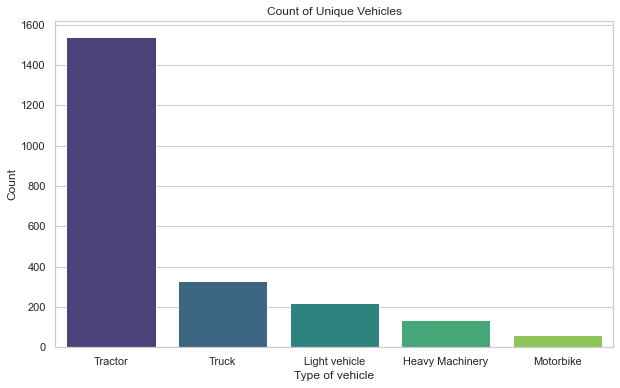

In [9]:
# Check the type of vehicles present
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Vehicle_Type', palette='viridis')
plt.ylabel("Count")
plt.xlabel("Type of vehicle")
plt.title('Count of Unique Vehicles')

# Save the plot
plt.savefig('Images/Type_of_vehicle.png', dpi=300, bbox_inches='tight')
plt.show()

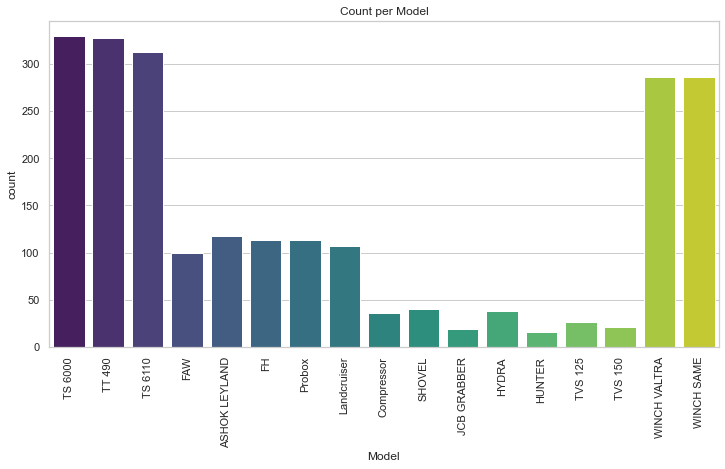

In [10]:
# Check the models present in the fleet
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(data=df, x ='Model', palette='viridis')
plt.xticks(rotation=90)
plt.title("Count per Model")
# Save the plot
plt.savefig('Models.png', dpi=300, bbox_inches='tight');

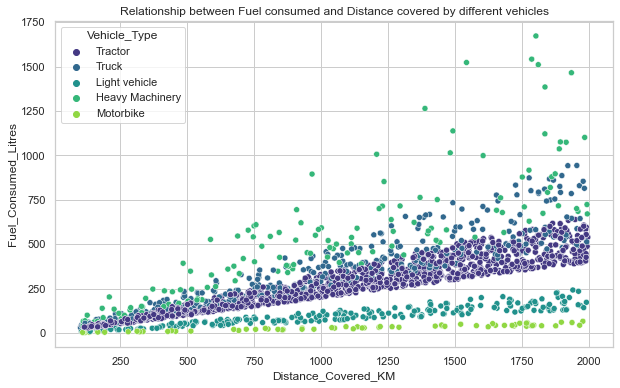

In [11]:
# Check the relationship between vehicle distance and fuel consumption
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Distance_Covered_KM', y='Fuel_Consumed_Litres', hue='Vehicle_Type', palette='viridis')
plt.title("Relationship between Fuel consumed and Distance covered by different vehicles")
# Save the plot
plt.savefig('Images/Fuel_vs_Distance_covered.png', bbox_inches='tight')
plt.show();

In [12]:
# Convert the date column to date
df['Service_Date']= pd.to_datetime(df['Service_Date'], errors='coerce')
#Extract months from the date 
df['Month']=df['Service_Date'].dt.strftime('%B')

Text(0.5, 1.0, 'Issues Reported among Different Models')

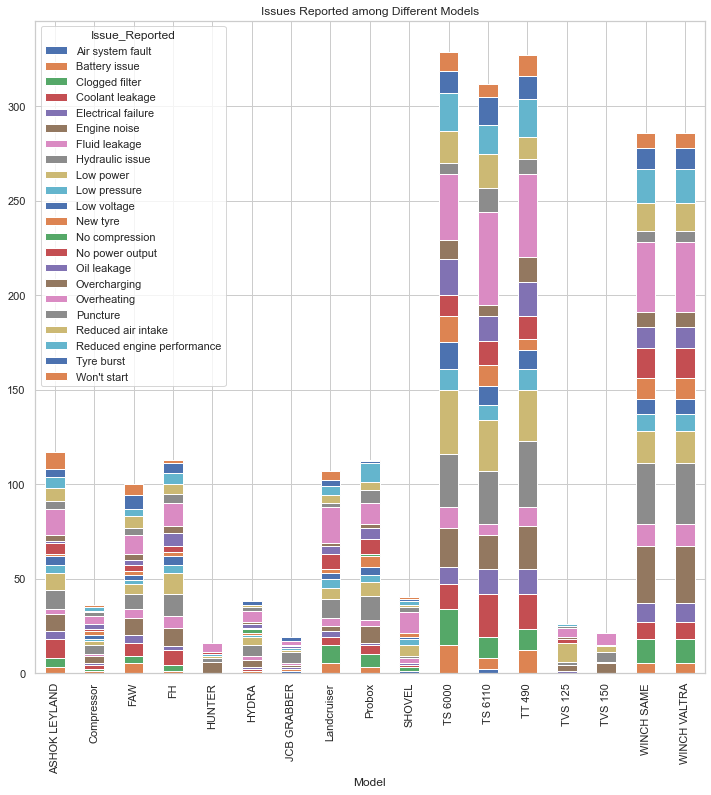

In [13]:
# Group Model with issue reported
sns.set_theme(style="whitegrid")
crossplot = pd.crosstab(df['Model'], df['Issue_Reported'])
# Plot the visualization for the same
crossplot.plot(kind='bar', stacked=True, figsize=(12,12))
plt.title("Issues Reported among Different Models")

In [14]:
# Bin the cost of ownership column for easy visualization
bins= [10000, 30000, 50000, float('inf')]
labels= ['low', 'medium', 'high']

Costing=pd.cut(df['Cost_of_Ownership'], bins=bins, labels=labels)

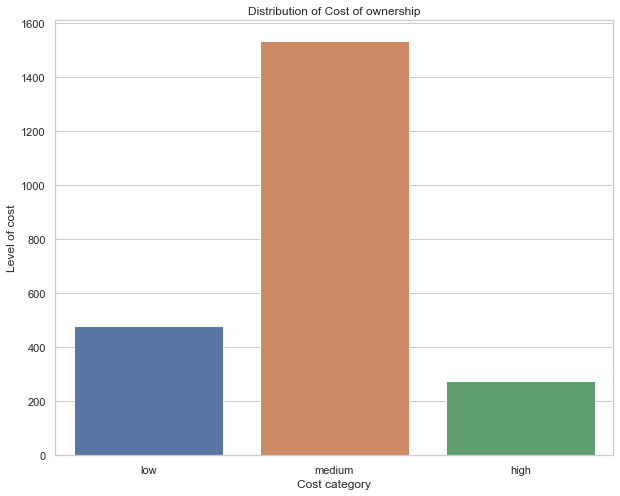

In [15]:
# Check the distribution of the cost of ownership
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.countplot(x=Costing, data=df)
plt.title('Distribution of Cost of ownership')
plt.xlabel('Cost category')
plt.ylabel('Level of cost')
# Save the plot
plt.savefig('Images/cost_of_ownership.png', dpi=300, bbox_inches='tight');

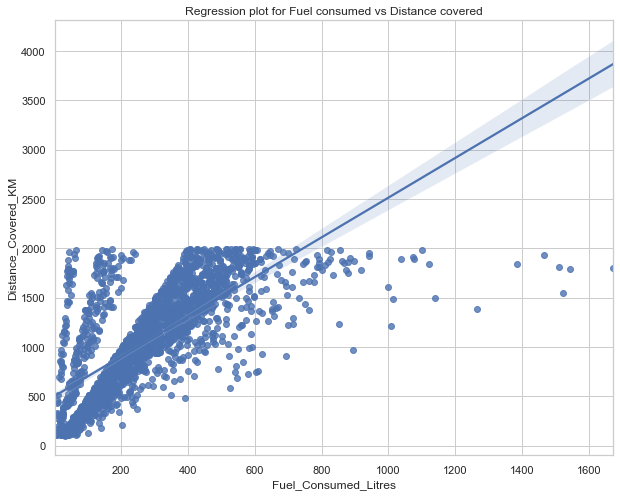

In [16]:
# Plot a regression plot to inspect for linear properties
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.regplot(x='Fuel_Consumed_Litres',y='Distance_Covered_KM',data=df)
plt.title('Regression plot for Fuel consumed vs Distance covered');

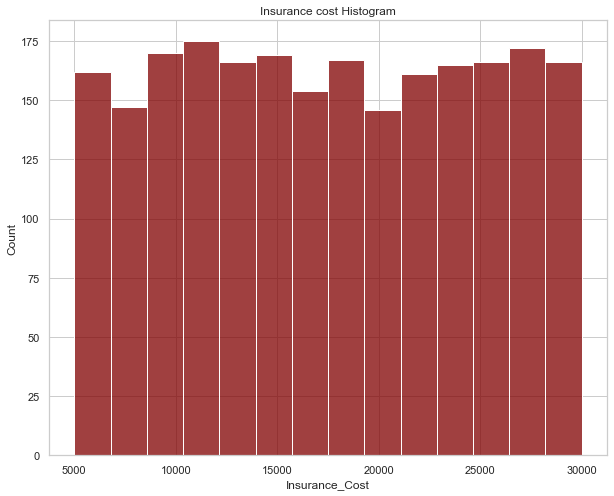

In [17]:
# Chcek for the distribution of insurance cost
plt.figure(figsize=(10,8))
sns.histplot(df['Insurance_Cost'],color="maroon")
plt.title("Insurance cost Histogram");

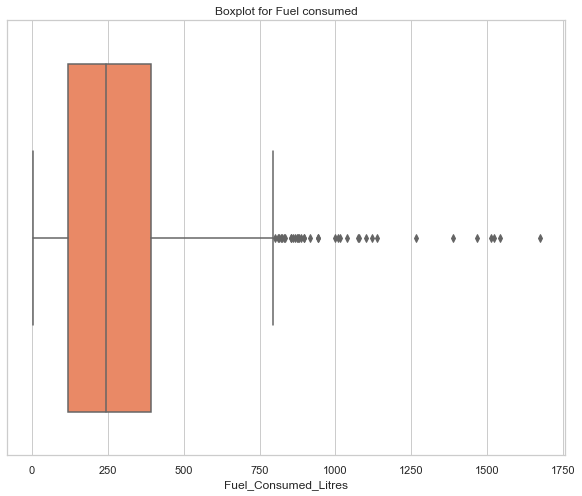

In [18]:
# Check for outliers in Fuel consumed
plt.figure(figsize=(10,8),)
sns.boxplot(x=df['Fuel_Consumed_Litres'], color="coral")
plt.title('Boxplot for Fuel consumed');


Checking column: Purchase_Cost


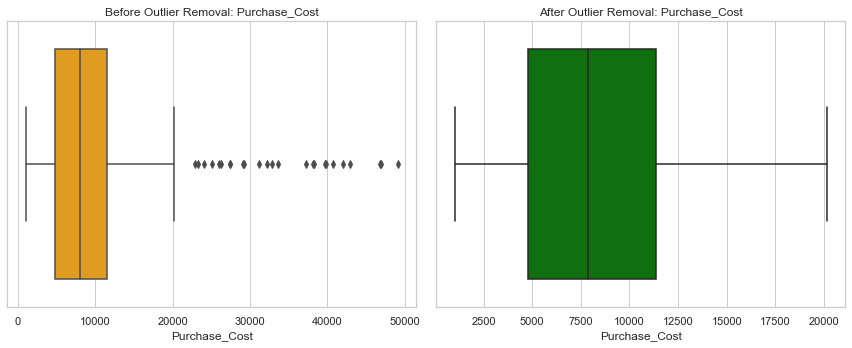


Checking column: Fuel_Consumed_Litres


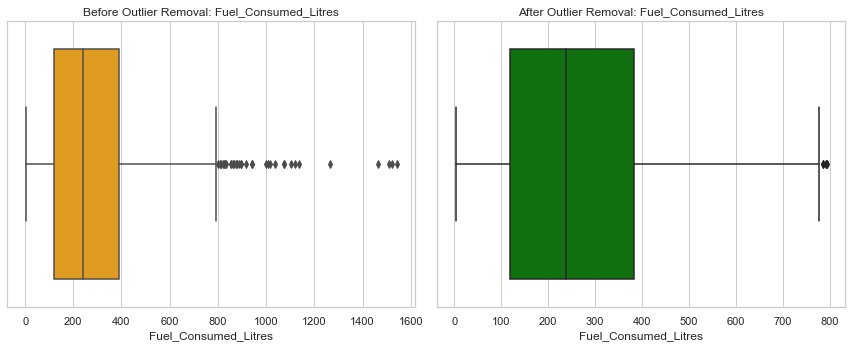


Checking column: Distance_Covered_KM


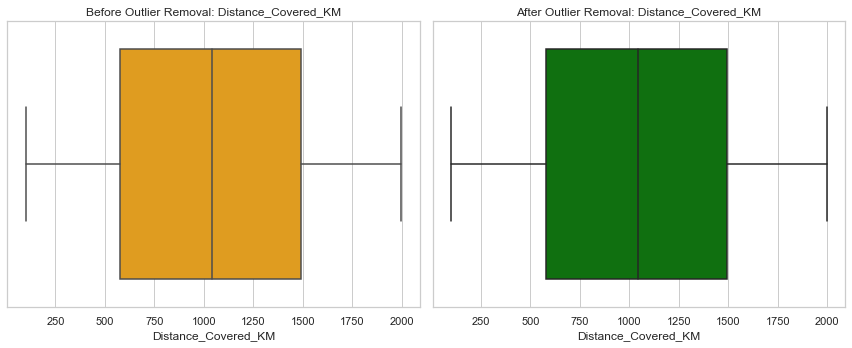


Checking column: Insurance_Cost


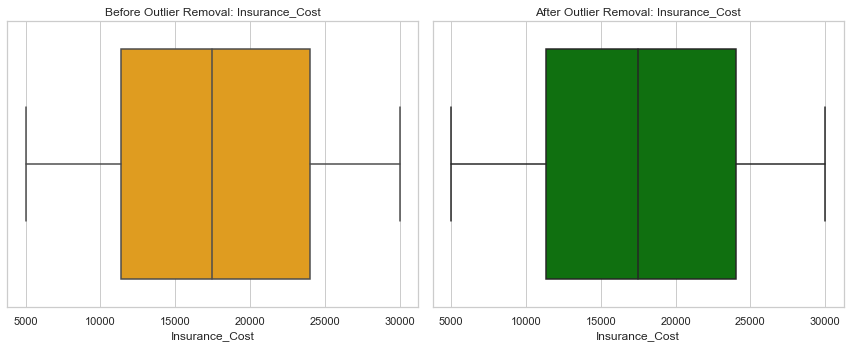


Checking column: Cost_of_Ownership


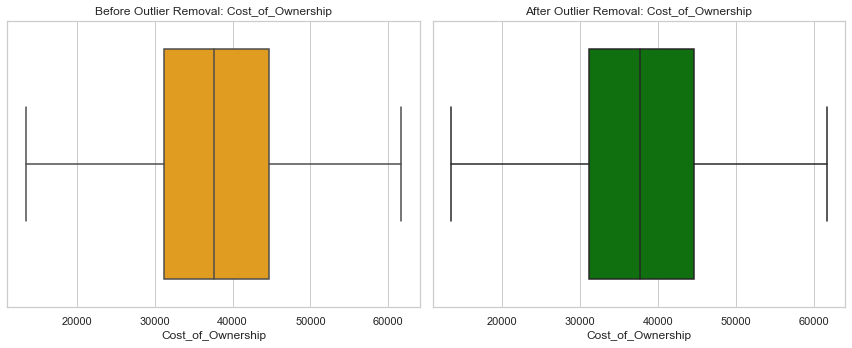


Final cleaned dataset shape: (2228, 17)


In [19]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned = df[(df[column] >= lower) & (df[column] <= upper)]
    return cleaned

def visualize_outliers(df, column):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f"Before Outlier Removal: {column}")
    
    cleaned = remove_outliers_iqr(df, column)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned[column], color='green')
    plt.title(f"After Outlier Removal: {column}")
    
    plt.tight_layout()
    plt.show()
    
    return cleaned

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Loop through and clean each numeric column
df_cleaned = df.copy()

for col in numeric_cols:
    print(f"\nChecking column: {col}")
    visualize_outliers(df_cleaned, col)
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"\nFinal cleaned dataset shape: {df_cleaned.shape}")


In [20]:
# Save the cleaned data to excel format
df.to_excel('Fleet_Operations.xlsx', index=False)


## Data engineering

After we are done with EDA, the next step is Modelling. Altough to be ablke to perfom modelling, we need to do slight data engineering for our data to be usable in the machine learning model. At this point we perfom `OneHotEncoding` to transform categorical data into continous form so that we are able to use for modelling. 

In [21]:
# Drop unecessary columns and select the target and feature variables
columns_to_drop= ['Part_Name','Number_Plate','Service_Date','Cost_of_Ownership']
X= df_cleaned.drop(columns=columns_to_drop, )
Y=df_cleaned['Cost_of_Ownership']

In [22]:
# Encode the X columns
X = pd.get_dummies(X, drop_first=True)


In [23]:
# Split data into training and testing sets
X_train,X_test, y_train, Y_test= train_test_split(X,Y, random_state=42, test_size=0.2)

In [24]:
#Scale the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## MODELLING
A t this point, we now want to fit out data into a machone learning model. The model learns the hidden patterns that we might not have been able to identify while doing EDA. To start with, we are going to fit linear regression model to act as our baseline model. The choice is influenced by the fact that our target variable is continous and therefore informing us that we are dealing with a regression problem. We can advance to other models later or tune the baseline model to achieve metrics and then decide on the final model for the project.

#### I) Linear Regression Model

In [25]:
# Instantiate the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Make predictions with the model
y_pred = baseline_model.predict(X_test_scaled)

In [27]:
# Check the perfomance of the model using R2 and MSE
R2= r2_score(Y_test,y_pred)
MSE= mean_squared_error(Y_test,y_pred)
print(f'R2 Score is:',R2)
print(f'The Mean Squared Error is:', MSE)

R2 Score is: 0.7746730097137526
The Mean Squared Error is: 19667997.934015214


The model explains 76% of the variation in the target variable. The Mean squared error is a high value and this calls for the improvemnt of our model or the use of a different model such as the `Random Forest Regressor` which works better with many columns. 

### II) Random forest Regression Model

In [28]:
# Instantiate the Random forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the train data to the model
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions using the Random forest model
y_pred_rf=rf_model.predict(X_test)


In [30]:
# Check the perfomance of the model using R2 and MSE
R2= r2_score(Y_test,y_pred_rf)
MSE= mean_squared_error(Y_test,y_pred_rf)
print(f'R2 Score is:',R2)
print(f'The Mean Squared Error is:', MSE)

R2 Score is: 0.803714433112365
The Mean Squared Error is: 17133074.55586529


The model explains about 73% of the variation in the target variable, which is ower than the perfomanmce of our baseline Model. The MSE  is also slight higher than our baseline model standing at 21072533.37. We can introduce Gridsearch to help search for parameters that give us optimal perfomance for the Randomforest Regressor

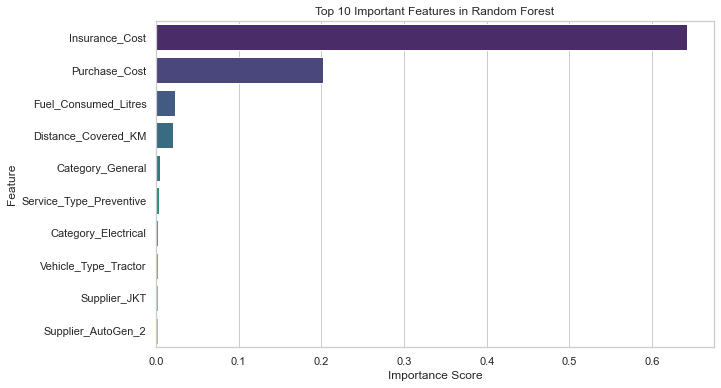

In [31]:
#Check for the importance of each feature
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot Top 10 features  
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices][:10], y=feature_names[sorted_indices][:10], palette='viridis')
plt.title('Top 10 Important Features in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
# Save the plot
plt.savefig('Images/Feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## III) Random Forest regressor with tuned hyperparameters

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
param_grid ={'n_estimators':[100,200],
             'max_depth': [2, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],}
grid= RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid, cv=5, scoring="r2", n_jobs=-1,
    verbose=1, random_state=42)

In [34]:
grid.fit(X_train, y_train)

print("Best R²:", grid.best_score_)
print("Best Params:", grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best R²: 0.7605096651692402
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Instantiate the GBR model
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit the model (use scaled features if appropriate)
gbr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate the model
r2_gbr = r2_score(Y_test, y_pred_gbr)
mse_gbr = mean_squared_error(Y_test, y_pred_gbr)

print(f"R² for Gradient Boosting Regressor: {r2_gbr:.4f}")
print(f"MSE for Gradient Boosting Regressor: {mse_gbr:.2f}")


R² for Gradient Boosting Regressor: 0.8003
MSE for Gradient Boosting Regressor: 17427784.43


In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("R² for Decision Tree:", r2_score(Y_test, y_pred_tree))
print("MSE for Decision Tree:", mean_squared_error(Y_test, y_pred_tree))

R² for Decision Tree: 0.6452171258265063
MSE for Decision Tree: 30967745.263910986


From all the models that we have fitted above, we can deduce that our data has more linear properties. This is because our baseline model which was a linearRegression model perfoms relatively well. From the Feature importance visualization while fitting the RandomForestRegression model shows that some features might be irrelevant or add very little value to our model. For the final model, I want to introduce a regulization technique to our baseline model. The regulization is the Lasso Regression whereby it helps reduce overfitting and also does feature selection by shrinking the coeffecients of the less important feature to zero.

In [37]:
from sklearn.linear_model import Lasso


# Define Lasso model and alpha grid
lasso = Lasso(max_iter=10000) 

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search for best alpha
grid_lasso = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_lasso.fit(X_train_scaled, y_train)

# Best parameters and CV result onTraining data
print("Best alpha:", grid_lasso.best_params_)
print("Best CV R²:", grid_lasso.best_score_)

# Evaluate on test set
y_pred_lasso = grid_lasso.best_estimator_.predict(X_test_scaled)

# Final evaluation
r2_lasso = r2_score(Y_test, y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)

print(f"Test R² for Lasso Regression: {r2_lasso:.4f}")
print(f"Test MSE for Lasso Regression: {mse_lasso:.2f}")


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.547e+08, tolerance: 1.237e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.926e+08, tolerance: 1.193e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Best alpha: {'alpha': 100}
Best CV R²: 0.7787466976623654
Test R² for Lasso Regression: 0.7876
Test MSE for Lasso Regression: 18538387.52


This model perfoms slightly better than all the other models we have previoulsy fitted. The R2 stands at 77% for the test/Unseen data whihc is a good perfomance. This means that the model can explain about 77% of the variance in the Target variable. The Mean Squared Error is also slightly lower. This hsows that the difference between the predicted and the actual values are not as high as the previous models.

In [38]:
coefficients = grid_lasso.best_estimator_.coef_
important_features = X_train.columns[coefficients != 0]

print(f"Total features retained: {len(important_features)}")
print("Key features influencing Cost of Ownership:")
print(important_features.tolist())


Total features retained: 36
Key features influencing Cost of Ownership:
['Purchase_Cost', 'Insurance_Cost', 'Vehicle_Type_Truck', 'Model_FH', 'Model_JCB GRABBER', 'Model_Landcruiser', 'Model_Probox', 'Model_TS 6000', 'Model_TS 6110', 'Model_TVS 125', 'Model_TVS 150', 'Model_WINCH SAME', 'Model_WINCH VALTRA', 'Category_Braking System', 'Category_Electrical', 'Category_Fuel System', 'Category_General', 'Category_Ignition', 'Category_Mechanical', 'Supplier_AutoGen_4', 'Supplier_AutoGen_6', 'Supplier_AutoGen_9', 'Issue_Reported_Clogged filter', 'Issue_Reported_Coolant leakage', 'Issue_Reported_Hydraulic issue', 'Issue_Reported_New tyre', 'Issue_Reported_No power output', 'Issue_Reported_Oil leakage', 'Issue_Reported_Overheating', 'Service_Type_Preventive', 'REG. NO._KTCA 101A', 'Month_August', 'Month_January', 'Month_July', 'Month_June', 'Month_March']




## **Conclusion**

The Lasso Regression model developed for this project effectively explains approximately **77%** of the variance in fleet ownership costs at Butali Sugar Mills Limited. After rigorous testing of various models, including Linear Regression, Random Forest, and Gradient Boosting, Lasso Regression demonstrated the best balance of predictive performance, simplicity, and interpretability.

The model's feature selection process retained 27 key predictors, highlighting the most significant cost drivers within the company's fleet operations. These include purchase and insurance costs, specific vehicle types and models, critical vehicle components, supplier influence, reported mechanical issues, and seasonal fluctuations.

The findings reveal that certain vehicle types, models, suppliers, and recurring technical issues significantly contribute to higher costs of ownership. Furthermore, noticeable seasonal patterns indicate predictable periods of increased expenditure, providing actionable insights for operational planning.

---






## **Recommendations**

1. **Optimize Procurement and Insurance Policies**

   * Implement more stringent vehicle acquisition assessments, focusing on total cost of ownership beyond the initial purchase price.
   * Review and renegotiate insurance coverage to achieve a more favorable balance between protection and cost efficiency.

2. **Review Fleet Composition**

   * Conduct detailed performance and cost evaluations for high-cost vehicle types and models, particularly trucks and other identified units, with the aim of optimizing fleet structure.

3. **Enhance Targeted Maintenance Programs**

   * Strengthen preventive maintenance strategies for critical vehicle systems, including braking, fuel, ignition, and mechanical components.
   * Introduce proactive diagnostics and technician retraining to reduce occurrences of battery failures, coolant leaks, and overcharging issues.

4. **Improve Supplier Management**

   * Evaluate the performance and product quality of key suppliers, particularly `AutoGen_9` and `AutoGen_10`.
   * Explore alternative suppliers or renegotiate contracts to minimize maintenance-related ownership costs.

5. **Plan for Seasonal Cost Fluctuations**

   * Utilize historical data to predict high-cost months such as August, December, and February.
   * Allocate resources and schedule preventive maintenance in advance to mitigate seasonal expenditure spikes.

6. **Continuous Data-Driven Improvements**

   * Maintain ongoing data collection and periodically retrain the model to capture new trends and evolving cost drivers.
   * Integrate insights from this model into strategic decision-making for the transport department to ensure sustainable cost reductions and operational efficiency.